In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/personal-finance-data/Personal_Finance_Dataset.csv


In [17]:
import warnings 
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("/kaggle/input/personal-finance-data/Personal_Finance_Dataset.csv")
df.shape

(1500, 5)

In [4]:
df.head()

,Date,Transaction Description,Category,Amount,Type
0,2020-01-02,Score each.,Food & Drink,1485.69,Expense
1,2020-01-02,Quality throughout.,Utilities,1475.58,Expense
2,2020-01-04,Instead ahead despite measure ago.,Rent,1185.08,Expense
3,2020-01-05,Information last everything thank serve.,Investment,2291.00,Income
4,2020-01-13,Future choice whatever from.,Food & Drink,1126.88,Expense


In [13]:
df.dtypes

Date                        object
Transaction Description     object
Category                    object
Amount                     float64
Type                        object
dtype: object

In [27]:
totals=df.groupby("Type")["Amount"].sum()

Text(0.5, 1.0, 'Annual Income vs Expenses')

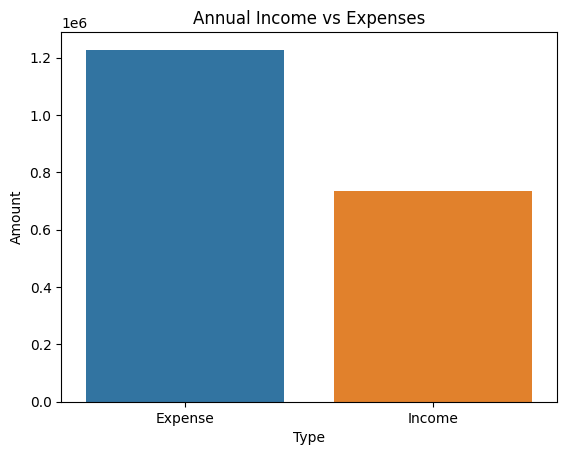

In [31]:
totals = df.groupby("Type")["Amount"].sum().reset_index()

# Plot
sns.barplot(data=totals, x="Type", y="Amount")
plt.title("Annual Income vs Expenses")

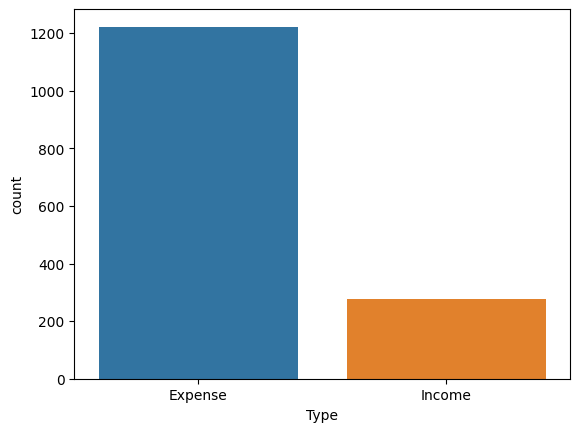

In [32]:
sns.countplot(data=df, x="Type")
plt.show()


In [33]:
df['Category'].unique()

array(['Food & Drink', 'Utilities', 'Rent', 'Investment', 'Shopping',
       'Other', 'Entertainment', 'Health & Fitness', 'Salary', 'Travel'],
      dtype=object)

In [74]:
exp_cat=['Food & Drink','Utilities','Rent','Shopping','Entertainment','Health & Fitness','Travel']
income_cat=['Investment','Salary']

df_expenses = df[df['Category'].isin(exp_cat)].groupby('Category')['Amount'].sum()
df_income=df[df['Category'].isin(income_cat)].groupby('Category')['Amount'].sum()
print("Expenses \n",df_expenses)

print("\n Income \n",df_income)

Expenses 
 Category
Entertainment       148165.47
Food & Drink        159493.39
Health & Fitness    145194.06
Rent                162075.39
Shopping            146880.75
Travel              169497.79
Utilities           146833.97
Name: Amount, dtype: float64

 Income 
 Category
Investment    363252.00
Salary        149053.55
Name: Amount, dtype: float64


Text(0.5, 1.0, 'Expenses Category')

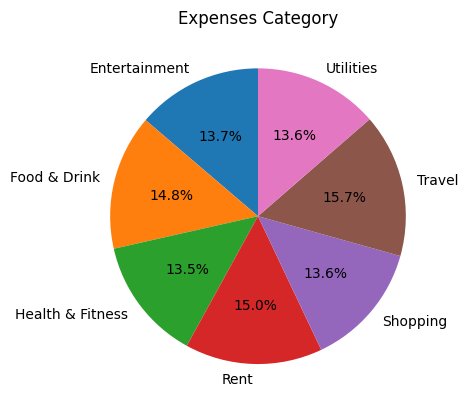

In [71]:
plt.pie(df_expenses,labels=df_expenses.index,autopct="%1.1f%%",startangle=90)
plt.title("Expenses Category")

([<matplotlib.patches.Wedge at 0x791b46466a50>,
 [Text(-0.8711716238876107, -0.6716100071715904, 'Investment'),
  Text(0.8711716867682742, 0.671609925606613, 'Salary')],
 [Text(-0.4751845221205149, -0.36633273118450377, '70.9%'),
  Text(0.4751845564190586, 0.36633268669451613, '29.1%')])

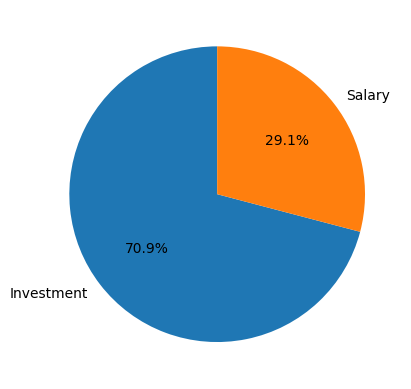

In [77]:
plt.pie(df_income,labels=df_income.index,autopct="%1.1f%%",startangle=90)